CS634101 FINAL TERM PROJECT

Name: Anjaligupta Raghavendra

UCID: ar2729

Instructor: Dr.Yasser Abduallah

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step

Random Forest Results:
+------------------------------------------------------------------------------------------------------------------------+
|                                                 Random Forest Metrics:                                                 |
+-------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+---------+
|            Metric | Fold 1 | Fold 2 | Fold 3 | Fold 4 | Fold 5 | Fold 6 | Fold 7 | Fold 8 | Fold 9 | Fold 10 | Average |
+-------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--

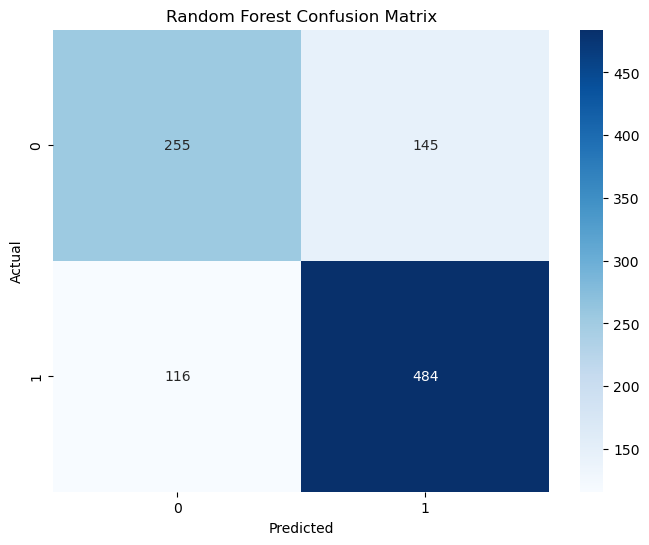




SVM Results:
+------------------------------------------------------------------------------------------------------------------------+
|                                                      SVM Metrics:                                                      |
+-------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+---------+
|            Metric | Fold 1 | Fold 2 | Fold 3 | Fold 4 | Fold 5 | Fold 6 | Fold 7 | Fold 8 | Fold 9 | Fold 10 | Average |
+-------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+---------+
|               TPR | 0.8750 | 0.8235 | 0.8689 | 0.8276 | 0.8136 | 0.8548 | 0.8197 | 0.8361 | 0.7966 |  0.7818 |  0.8298 |
|               FPR | 0.6364 | 0.4375 | 0.4872 | 0.5476 | 0.5122 | 0.3421 | 0.5385 | 0.6154 | 0.5610 |  0.4667 |  0.5144 |
|               TNR | 0.3636 | 0.5625 | 0.5128 | 0.4524 | 0.4878 | 0.6579 | 0.4615 | 0.3846 | 0.4390 |  0.5333 |  0.4856 |


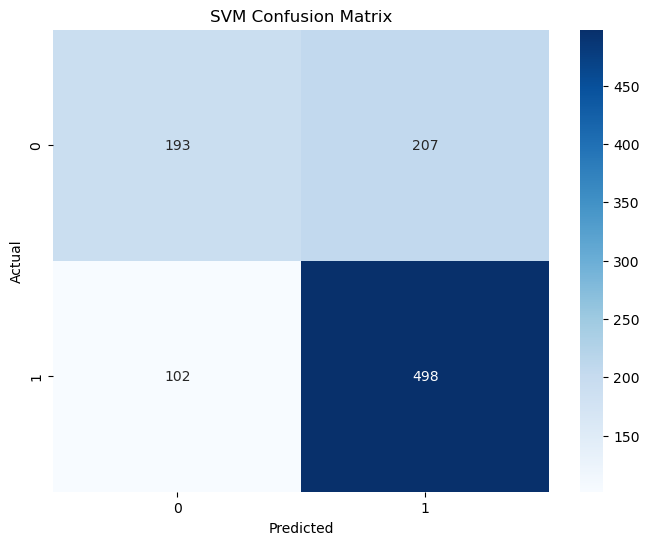




BiLSTM Results:
+------------------------------------------------------------------------------------------------------------------------+
|                                                    BiLSTM Metrics:                                                     |
+-------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+---------+
|            Metric | Fold 1 | Fold 2 | Fold 3 | Fold 4 | Fold 5 | Fold 6 | Fold 7 | Fold 8 | Fold 9 | Fold 10 | Average |
+-------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+---------+
|               TPR | 0.9107 | 0.7059 | 0.6557 | 0.7586 | 0.8644 | 0.7258 | 0.8197 | 0.7541 | 0.8814 |  0.8909 |  0.7967 |
|               FPR | 0.9091 | 0.6250 | 0.4872 | 0.5238 | 0.4634 | 0.2632 | 0.5128 | 0.3333 | 0.4878 |  0.3111 |  0.4917 |
|               TNR | 0.0909 | 0.3750 | 0.5128 | 0.4762 | 0.5366 | 0.7368 | 0.4872 | 0.6667 | 0.5122 |  0.6889 |  0.5083

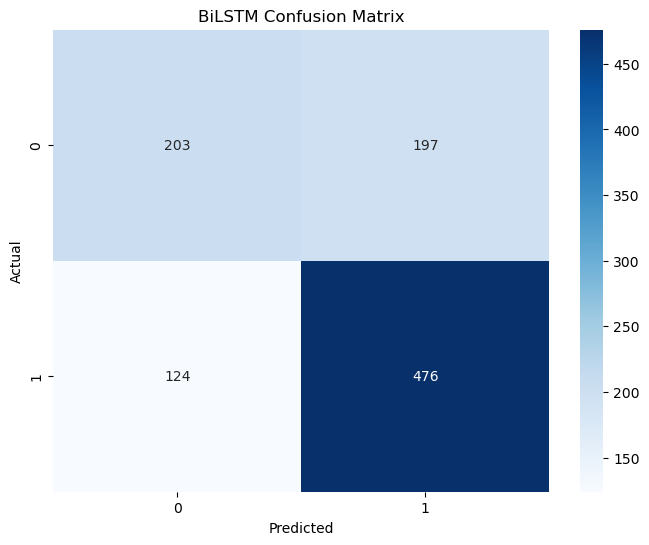



The fastest algorithm is: SVM

Model Comparison:
+----------------------------------------------------------------------------------------+
|                                    Model Comparison                                    |
+---------------+----------+-----------+--------+----------+---------+-------------------+
| Model         | Accuracy | Precision | Recall | F1 Score | ROC_AUC | Runtime (seconds) |
+---------------+----------+-----------+--------+----------+---------+-------------------+
| Random Forest |   0.7390 |    0.7697 | 0.8057 |   0.7867 |  0.7987 |            0.0857 |
| SVM           |   0.6910 |    0.7075 | 0.8298 |   0.7627 |  0.7514 |            0.0467 |
| BiLSTM        |   0.6790 |    0.7152 | 0.7967 |   0.7490 |  0.7585 |            2.0633 |
+---------------+----------+-----------+--------+----------+---------+-------------------+


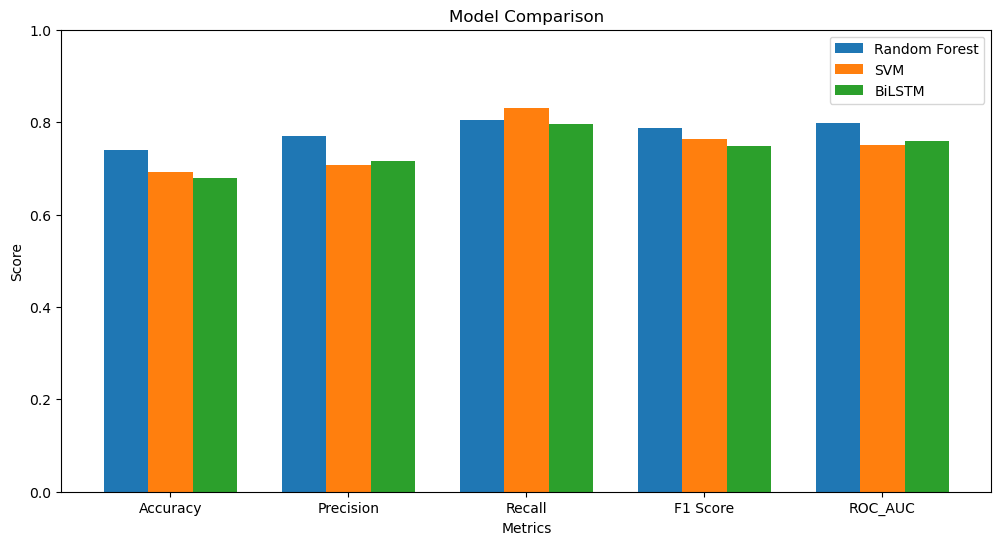

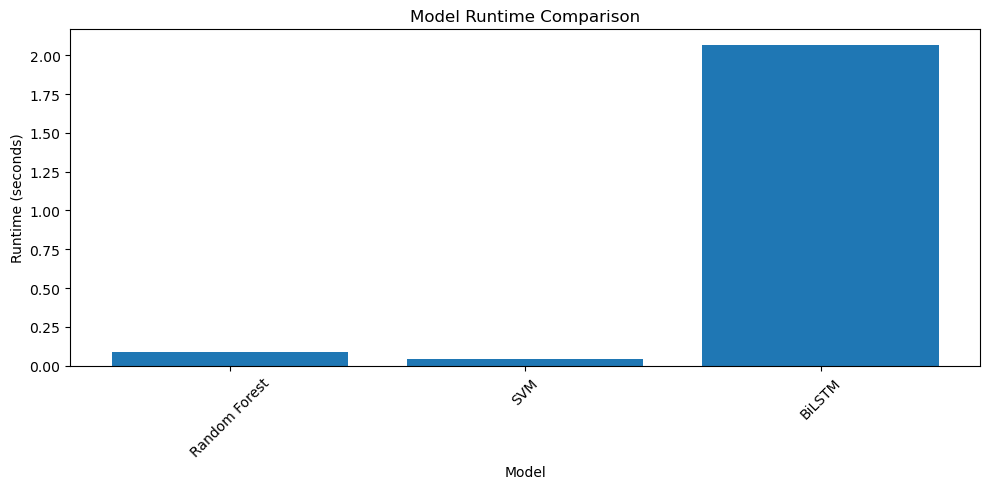

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import time
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional
from prettytable import PrettyTable
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('eTransactionData.csv')

# Data Preprocessing 
X = data.drop(columns=['Unnamed: 0', 'Transaction ID', 'Customer ID', 'Is Fraudulent', 'IP Address', 'Shipping Address', 'Billing Address'])
y = data['Is Fraudulent']

# Handle dates
X['Transaction Date'] = pd.to_datetime(X['Transaction Date'])
X['Transaction Day'] = X['Transaction Date'].dt.day
X['Transaction Month'] = X['Transaction Date'].dt.month
X['Transaction Year'] = X['Transaction Date'].dt.year
X = X.drop(columns=['Transaction Date'])

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['Payment Method', 'Product Category', 'Customer Location', 'Device Used']
for col in categorical_cols:
    X[col] = le.fit_transform(X[col].astype(str))

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Normalize numerical columns
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Initialize KFold
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'BiLSTM': Sequential([
        Bidirectional(LSTM(64, input_shape=(X.shape[1], 1))),
        Dense(1, activation='sigmoid')
    ])
}

results = {model_name: [] for model_name in models.keys()}
confusion_matrices = {model_name: np.zeros((2, 2)) for model_name in models.keys()}

for model_name, model in models.items():
    metrics_list = []
    total_time = 0
    
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        # Splitting the data
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # For BiLSTM reshape input data to 3D [samples, timesteps, features]
        if model_name == 'BiLSTM':
            X_train = np.expand_dims(X_train.values, axis=2)
            X_test = np.expand_dims(X_test.values, axis=2)
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        
        # Measure time taken for training and prediction
        start_time = time.time()
        
        if model_name == 'BiLSTM':
            model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
            y_pred_prob = model.predict(X_test).ravel()
        else:
            model.fit(X_train, y_train)
            y_pred_prob = model.predict_proba(X_test)[:, 1]
        
        runtime = time.time() - start_time
        total_time += runtime
        
        # Binarize predictions for threshold 0.5
        y_pred = (y_pred_prob >= 0.5).astype(int)
        
        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices[model_name] += cm
        
        # Calculate metrics
        tn, fp, fn, tp = cm.ravel()
        
        tpr = tp / (tp + fn)  # True Positive Rate (Recall)
        fpr = fp / (fp + tn)  # False Positive Rate
        tnr = tn / (tn + fp)  # True Negative Rate (Specificity)
        fnr = fn / (fn + tp)  # False Negative Rate
        
        precision = precision_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        error_rate = 1 - accuracy
        f1 = f1_score(y_test, y_pred)
        
        bacc = (tpr + tnr) / 2  # Balanced Accuracy
        tss = tpr - fpr         # True Skill Statistic
        hss = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn))  # Heidke Skill Score
        
        bs = np.mean((y_pred_prob - y_test) ** 2)  # Brier Score
        bss = 1 - bs / np.var(y_test)             # Brier Skill Score
        
        roc_auc = roc_auc_score(y_test, y_pred_prob)
        
        metrics_list.append({
            'Fold': f'Fold {fold}',
            'TPR': tpr,
            'FPR': fpr,
            'TNR': tnr,
            'FNR': fnr,
            'Precision': precision,
            'Accuracy': accuracy,
            'Recall': recall,
            'Error Rate': error_rate,
            'F1 Score': f1,
            'BACC': bacc,
            'TSS': tss,
            'HSS': hss,
            'BS': bs,
            'BSS': bss,
            'ROC_AUC': roc_auc,
            'Runtime (seconds)': runtime
        })
    
    # Add average metrics
    avg_metrics = {metric: np.mean([fold[metric] for fold in metrics_list if metric != 'Fold']) for metric in metrics_list[0] if metric != 'Fold'}
    avg_metrics['Fold'] = 'Average'
    avg_metrics['Total Runtime'] = total_time
    
    metrics_list.append(avg_metrics)
    results[model_name] = metrics_list

#printing pretty table for the output
def print_pretty_table(data, title):
    df = pd.DataFrame(data)

    required_metrics = ['TPR', 'FPR', 'TNR', 'FNR', 'Precision', 'Accuracy', 'Recall', 'Error Rate', 
                        'F1 Score', 'BACC', 'TSS', 'HSS', 'BS', 'BSS', 'ROC_AUC', 'Runtime (seconds)']
    for metric in required_metrics:
        if metric not in df.columns:
            df[metric] = np.nan
    
    if 'Total Runtime' in df.iloc[-1]:
        df.loc[df.index[-1], 'Runtime (seconds)'] = df.iloc[-1]['Total Runtime']
    
    df_selected = df[['Fold'] + required_metrics]
    df_transposed = df_selected.set_index('Fold').transpose()
    
    table = PrettyTable()
    table.title = title
    table.field_names = ['Metric'] + list(df_transposed.columns)
    table.align = 'r'
    table.float_format = '.4'
    
    # Adding more rows to the table
    for index, row in df_transposed.iterrows():
        table.add_row([index] + list(row))
    
    print(table)

# # Function to print confusion matrix
# def print_confusion_matrix(cm, title):
#     table = PrettyTable()
#     table.title = title
#     table.field_names = ["", "Predicted Negative", "Predicted Positive"]
#     table.add_row(["Actual Negative", cm[0, 0], cm[0, 1]])
#     table.add_row(["Actual Positive", cm[1, 0], cm[1, 1]])
#     print(table)

# Function to visualize confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Print tables, confusion matrices, and visualizations for each model
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    print_pretty_table(metrics, f"{model_name} Metrics:")
    print(f"\n{model_name} Confusion Matrix (Sum of all folds):")
    # print_confusion_matrix(confusion_matrices[model_name], f"{model_name} Confusion Matrix")
    plot_confusion_matrix(confusion_matrices[model_name], f"{model_name} Confusion Matrix")
    print("\n" + "="*50 + "\n")

# Identify and print the fastest algorithm based on total runtime
fastest_model = min(results.keys(), key=lambda k: results[k][-1]['Total Runtime'])
print(f"The fastest algorithm is: {fastest_model}")
print("==================================================")

# Create a comparison table using PrettyTable
comparison_table = PrettyTable()
comparison_table.title = "Model Comparison"
comparison_table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC_AUC", "Runtime (seconds)"]
comparison_table.float_format = '.4'
comparison_table.align = 'r'
comparison_table.align["Model"] = 'l'  # Left-align the Model column

for model_name, metrics in results.items():
    avg_metrics = metrics[-1]  # The last row contains the average metrics
    comparison_table.add_row([
        model_name,
        avg_metrics['Accuracy'],
        avg_metrics['Precision'],
        avg_metrics['Recall'],
        avg_metrics['F1 Score'],
        avg_metrics['ROC_AUC'],
        avg_metrics['Runtime (seconds)']
    ])

# Print comparison table
print("\nModel Comparison:")
print(comparison_table)

# Visualize model comparison
plt.figure(figsize=(12, 6))
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC']
x = np.arange(len(metrics_to_plot))
width = 0.25

for i, model in enumerate(comparison_table.rows):
    values = [model[comparison_table.field_names.index(metric)] for metric in metrics_to_plot]
    plt.bar(x + i*width, values, width, label=model[0])

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(x + width, metrics_to_plot)
plt.legend()
plt.ylim(0, 1)
plt.show()

# Runtime comparison
plt.figure(figsize=(10, 5))
models = [row[0] for row in comparison_table.rows]
runtimes = [row[-1] for row in comparison_table.rows]
plt.bar(models, runtimes)
plt.xlabel('Model')
plt.ylabel('Runtime (seconds)')
plt.title('Model Runtime Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()